[![Review Assignment Due Date](https://classroom.github.com/assets/deadline-readme-button-24ddc0f5d75046c5622901739e7c5dd533143b0c8e959d652212380cedb1ea36.svg)](https://classroom.github.com/a/ARi37hLH)
[![Open in Visual Studio Code](https://classroom.github.com/assets/open-in-vscode-718a45dd9cf7e7f842a935f5ebbe5719a5e09af4491e668f4dbf3b35d5cca122.svg)](https://classroom.github.com/online_ide?assignment_repo_id=14983256&assignment_repo_type=AssignmentRepo)
# Auto-sklearn Fail

The code in `fail.py` runs
[auto-sklearn](https://automl.github.io/auto-sklearn/master/) on a dataset for 5
minutes. The model it finds after that time is *worse* than just using a random
forest with default hyperparameters.

Find out what's going on, why auto-sklearn's performance is so bad, and how to
fix it. If you cannot run auto-sklearn yourself, you can use [this
colab](https://colab.research.google.com/drive/1goMxbe5P9TA9V6qzpA-RB01TmPiZB8AC?usp=sharing)
as a starting point.

## Submission

Add your report detailing your findings and code to this repository. Be specific
when you explain why auto-sklearn fails here -- what does auto-sklearn do that
results in bad performance, why is this a problem on this particular dataset,
and what can you do to fix it?

## Resources

- https://www.youtube.com/watch?v=ugN8U--oUaU&t=1s

In [24]:
!pip install git+https://github.com/Frankothe196/auto-sklearn.git@python3.10-added-compatibility

  Cloning https://github.com/Frankothe196/auto-sklearn.git (to revision python3.10-added-compatibility) to /tmp/pip-req-build-5m5wm8d6
  Running command git clone --filter=blob:none --quiet https://github.com/Frankothe196/auto-sklearn.git /tmp/pip-req-build-5m5wm8d6
  Running command git checkout -b python3.10-added-compatibility --track origin/python3.10-added-compatibility
  Switched to a new branch 'python3.10-added-compatibility'
  Branch 'python3.10-added-compatibility' set up to track remote branch 'python3.10-added-compatibility' from 'origin'.
  Resolved https://github.com/Frankothe196/auto-sklearn.git to commit 80a575760e99945fa31970b1479edeb759bc645a
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [25]:
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Check Data Distribution

In [26]:
import numpy as np
import pandas as pd

In [27]:
X.shape

(1599, 11)

In [28]:
target_values = np.unique(y).tolist()
target_values

['3', '4', '5', '6', '7', '8']

In [29]:
target_counts = y.value_counts()
target_counts

class
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [30]:
for quality in target_values:
  number_of_quality = target_counts[quality]
  sample_size = target_counts.sum()
  percentage_quality = round(number_of_quality / sample_size, 2)
  print(f"Percentage of quality ({quality}) : {percentage_quality}")

Percentage of quality (3) : 0.01
Percentage of quality (4) : 0.03
Percentage of quality (5) : 0.43
Percentage of quality (6) : 0.4
Percentage of quality (7) : 0.12
Percentage of quality (8) : 0.01


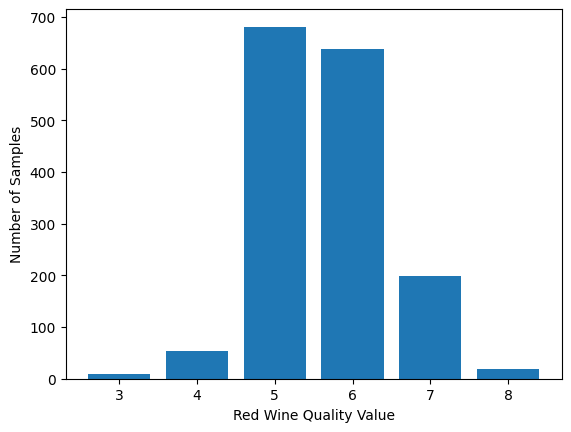

In [31]:
# SOURCE : https://youtu.be/zwSJeIcRFuQ?si=m4lVMrKVyXncqLkY

import matplotlib.pyplot as plt

graph_heights = []
for quality in target_values:
  number_of_quality = target_counts[quality]
  graph_heights.append(number_of_quality)

number_of_target_values = len(target_values)

graph_positions = range(number_of_target_values)

plt.bar(graph_positions, graph_heights)

plt.xticks(graph_positions, target_values)

plt.xlabel("Red Wine Quality Value")
plt.ylabel("Number of Samples")

plt.show()

In [32]:
# *********************
# LINE BELOW IS CHANGED
# *********************

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)

In [33]:
target_values = np.unique(y_test).tolist()
target_values

['3', '4', '5', '6', '7', '8']

In [34]:
target_counts = y_test.value_counts()
target_counts

class
6    169
5    164
7     48
4     13
8      5
3      1
Name: count, dtype: int64

In [35]:
for quality in target_values:
  number_of_quality = target_counts[quality]
  sample_size = target_counts.sum()
  percentage_quality = round(number_of_quality / sample_size, 2)
  print(f"Percentage of quality ({quality}) : {percentage_quality}")

Percentage of quality (3) : 0.0
Percentage of quality (4) : 0.03
Percentage of quality (5) : 0.41
Percentage of quality (6) : 0.42
Percentage of quality (7) : 0.12
Percentage of quality (8) : 0.01


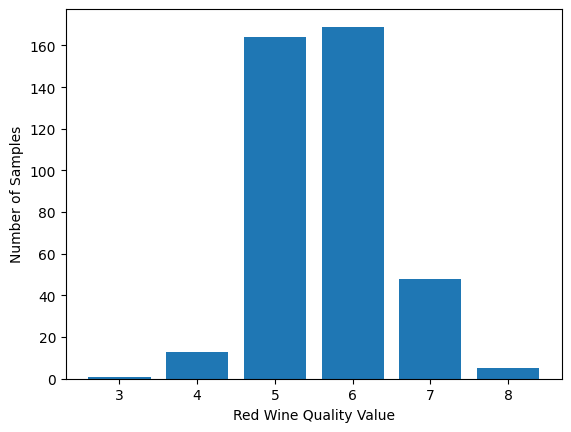

In [36]:
# SOURCE : https://youtu.be/zwSJeIcRFuQ?si=m4lVMrKVyXncqLkY

import matplotlib.pyplot as plt

graph_heights = []
for quality in target_values:
  number_of_quality = target_counts[quality]
  graph_heights.append(number_of_quality)

number_of_target_values = len(target_values)

graph_positions = range(number_of_target_values)

plt.bar(graph_positions, graph_heights)

plt.xticks(graph_positions, target_values)

plt.xlabel("Red Wine Quality Value")
plt.ylabel("Number of Samples")

plt.show()

## Replace `train_test_split` with `stratifiedShuffleSplit`

Due to the imbalanced nature of the dataset, `train_test_split` should be avoided and replaced with an alternative splitting algorithm such as `stratifiedShuffleSplit` as the "the folds are made by preserving the percentage of samples for each class."

See documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# The default test split size for train_test_split is 0.25... so keep that constant to the initial train_test_split line.
TEST_SPLIT_SIZE = 0.25

# Keep the random state constant from the initial train_test_split line
RANDOM_STATE = 42

split = StratifiedShuffleSplit(
  n_splits=1,
  test_size=TEST_SPLIT_SIZE,
  random_state=RANDOM_STATE
)

X_train: pd.Series
y_train: pd.Series
X_test: pd.Series
y_test: pd.Series

for train_index, test_index in split.split(X, y):

  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]

  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

In [38]:
target_values = np.unique(y_test).tolist()
target_values

['3', '4', '5', '6', '7', '8']

In [39]:
target_counts = y_test.value_counts()
target_counts

class
5    170
6    160
7     50
4     13
8      5
3      2
Name: count, dtype: int64

In [40]:
for quality in target_values:
  number_of_quality = target_counts[quality]
  sample_size = target_counts.sum()
  percentage_quality = round(number_of_quality / sample_size, 2)
  print(f"Percentage of quality ({quality}) : {percentage_quality}")

Percentage of quality (3) : 0.0
Percentage of quality (4) : 0.03
Percentage of quality (5) : 0.42
Percentage of quality (6) : 0.4
Percentage of quality (7) : 0.12
Percentage of quality (8) : 0.01


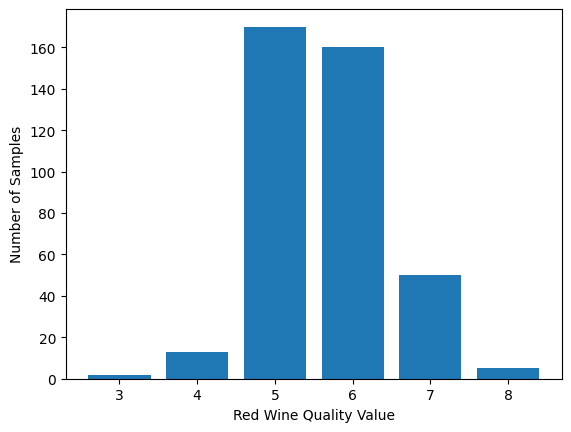

In [41]:
# SOURCE : https://youtu.be/zwSJeIcRFuQ?si=m4lVMrKVyXncqLkY

import matplotlib.pyplot as plt

graph_heights = []
for quality in target_values:
  number_of_quality = target_counts[quality]
  graph_heights.append(number_of_quality)

number_of_target_values = len(target_values)

graph_positions = range(number_of_target_values)

plt.bar(graph_positions, graph_heights)

plt.xticks(graph_positions, target_values)

plt.xlabel("Red Wine Quality Value")
plt.ylabel("Number of Samples")

plt.show()

## Classification

In [42]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print("RF Accuracy", sklearn.metrics.accuracy_score(y_test, y_hat))

RF Accuracy 0.655


In [43]:
from autosklearn.classification import AutoSklearnClassifier

automl = AutoSklearnClassifier()

automl.get_params()

{'allow_string_features': True,
 'dask_client': None,
 'dataset_compression': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'disable_progress_bar': False,
 'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
 'ensemble_kwargs': None,
 'ensemble_nbest': 50,
 'ensemble_size': None,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': None,
 'per_run_time_limit': None,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 3600,
 'tmp_folder': None}

In [44]:
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import f1_weighted

TASK_TIME = 300

# By default, the strategy is "holdout" whcih is a simple train-test split of (67:33);
# Change it to K-fold CV:
RESAMPLING_STRATEGY = {
    "train_size": 0.8,
    "shuffle": True,
    "random_state": 42,
    "folds": 10
}

# By default, AutoSklearn chooses "accuracy" for this dataset-specific task.
# Change it to consider the imbalance:
SCORING_METRIC = f1_weighted

# By default, Bayesian Optimization for AutoSklearn is warm-started using previous training knowledge;
# Disable this to allow the optimization to start with a blank page:
INITIAL_CONFIGURATIONS = 0

ENSEMBLE_CLASS = None

PER_RUN_TIME_LIMIT = 150

ENSEMBLE_KWARGS = {
    "ensemble_size" : 0
}

automl = AutoSklearnClassifier(
    time_left_for_this_task=TASK_TIME,
    resampling_strategy_arguments=RESAMPLING_STRATEGY,
    metric=SCORING_METRIC,
    # per_run_time_limit=PER_RUN_TIME_LIMIT,
    # ensemble_kwargs=ENSEMBLE_KWARGS,
    # initial_configurations_via_metalearning=INITIAL_CONFIGURATIONS,
    # ensemble_class=ENSEMBLE_CLASS,
    # ensemble_nbest=5
)

automl.fit(X_train, y_train)

y_hat = automl.predict(X_test)

print("AutoML Accuracy", sklearn.metrics.accuracy_score(y_test, y_hat))

Fitting to the training data:   0%|          | 0/300 [00:00<?, ?it/s, The total time budget for this task is 0:05:00]/usr/local/lib/python3.10/dist-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(
Fitting to the training data: 100%|██████████| 300/300 [04:51<00:00,  1.03it/s, The total time budget for this task is 0:05:00]


AutoML Accuracy 0.6725


In [45]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: f4398491-0c5a-11ef-85dd-0242ac1c000c
  Metric: f1_weighted
  Best validation score: 0.685641
  Number of target algorithm runs: 45
  Number of successful target algorithm runs: 40
  Number of crashed target algorithm runs: 4
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [46]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
45,1,0.02,random_forest,0.314359,3.778857
20,2,0.58,adaboost,0.333606,1.515177
7,3,0.02,liblinear_svc,0.423413,10.293934
37,4,0.26,adaboost,0.438957,4.273169
22,5,0.02,qda,0.442830,1.178648
44,6,0.02,extra_trees,0.640548,1.792388
46,7,0.08,sgd,0.780102,1.154142
